### Question 2. 
In this problem, you will train a classifier on the MNIST dataset. You can find this dataset
in TorchVision. Train a fully-connected neural network with 2 hidden layers and ReLU activations.

In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# downloading MNSIT training and testing dataset

transform = transforms.Compose([transforms.ToTensor(),                    # ToTensor converts image to numbers
                              transforms.Normalize((0.1307,), (0.3081,)), # global mean and standard deviation of MNIST data set
                              ])                                          

batch_size = 64

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./root', 
                             train=True, 
                             download=True,
                             transform=transform),
    batch_size=batch_size, 
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./root', 
                             train=False, 
                             download=True,
                             transform = transform),
    batch_size=batch_size, 
    shuffle=True)


We use the root parameter to define where to save the data.

The train parameter is set to true because we are initializing the MNIST training dataset.

The download parameter is set to true because we want to download it if it’s not already present in our data folder.

The transform parameter is set to none because we don’t want to apply any image manipulation transforms at this time.  <br>

The values 0.1307 and 0.3081 used for the Normalize() transformation are the global mean and standard deviation of the MNIST dataset.   






In [3]:
len(train_loader)

938

In [4]:
ex = enumerate(train_loader)
batch_idx,(ex_data,ex_target) = next(ex)
print(ex_data.shape)

torch.Size([64, 1, 28, 28])


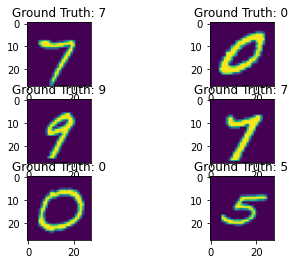

In [5]:
fig = plt.figure()
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(ex_data[i][0],interpolation = None)
    plt.title("Ground Truth: {}".format(ex_target[i]))
#fig


In [6]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


This means that in one batch we have 64 samples of greyscale( as second element is 1),28x28 pixels.

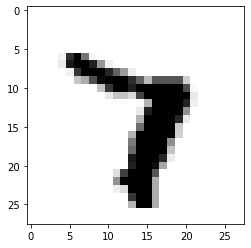

In [7]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

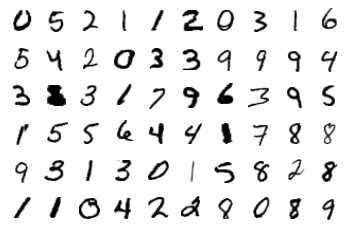

In [8]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [9]:
# creating the neural network

class Net(nn.Module):                   # inherits of the base class nn.Module.
    def __init__(self):                 # class initialization
        super(Net,self).__init__()      # super creates an instance of the base nn.Module class
        self.fc1 = nn.Linear(28*28,200) # 28*28 is the number of neurons in layer1 and 200 is the numbers of neurons in next layer
        self.fc2 = nn.Linear(200,200)
        self.fc3 = nn.Linear(200,10)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x)

As we flattent he image before sending to the input of neural network, so the input size is 28*28 = 784

In [10]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)


In [11]:
# defining the optimizer and the loss function 

learning_rate = 0.01
optimizer = optim.SGD(net.parameters(),lr= learning_rate,momentum = 0.9)


In [12]:
# defining the loss function
criterion = nn.NLLLoss()

#### Negative log-likelihood loss. 
It is useful to train a classification problem with C classes. Together the LogSoftmax() and NLLLoss() acts as the cross-entropy loss
        

In [13]:

images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logps = net(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

<ipython-input-9-e2cd798931e5>:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [14]:
loss.item()

2.31947660446167

In [15]:
len(test_loader)

157

In [16]:
len(train_loader)

938

In [17]:
938*15


14070

In [18]:
%%time
seed = 42

epochs = 15
train_loss = []
train_loss_counter = []
train_loss_counter1 = []
losses1 = []

accuracy = []
total=0
c=0
for e in range(epochs):
    running_loss = 0
    total=0
    correct = 0
    for images, labels in train_loader:
        # Flatten MNIST images into a 784 long vector
        
        images = images.view(images.shape[0], -1)
        
        # Training pass
        optimizer.zero_grad()
        
        output = net(images)
        loss = criterion(output, labels)
        train_loss.append(loss.item())
        
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(labels.data.view_as(pred)).sum()
        total+=1
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_loader)))
    train_loss_counter1.append(c)
    
    losses1.append(running_loss/len(train_loader))
    # for calculating the accuracy
    c+=1
    accuracy.append(100.0 * correct / total)
#print(correct,total,accuracy)
#print("\nTraining Time (in minutes) =",(time()-time0)/60)

<ipython-input-9-e2cd798931e5>:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Epoch 0 - Training loss: 0.304373405393221
tensor(54643) 938 [tensor(5825.4800)]
Epoch 1 - Training loss: 0.10799590932395953
tensor(58025) 938 [tensor(5825.4800), tensor(6186.0342)]
Epoch 2 - Training loss: 0.0720263075670287
tensor(58670) 938 [tensor(5825.4800), tensor(6186.0342), tensor(6254.7974)]
Epoch 3 - Training loss: 0.05174632400258391
tensor(59040) 938 [tensor(5825.4800), tensor(6186.0342), tensor(6254.7974), tensor(6294.2432)]
Epoch 4 - Training loss: 0.03884314301102035
tensor(59277) 938 [tensor(5825.4800), tensor(6186.0342), tensor(6254.7974), tensor(6294.2432), tensor(6319.5098)]
Epoch 5 - Training loss: 0.030319640124308517
tensor(59409) 938 [tensor(5825.4800), tensor(6186.0342), tensor(6254.7974), tensor(6294.2432), tensor(6319.5098), tensor(6333.5820)]
Epoch 6 - Training loss: 0.02212918605178849
tensor(59584) 938 [tensor(5825.4800), tensor(6186.0342), tensor(6254.7974), tensor(6294.2432), tensor(6319.5098), tensor(6333.5820), tensor(6352.2388)]
Epoch 7 - Training los

In [32]:
output.shape

torch.Size([32, 10])

In [19]:
print(images.shape)

torch.Size([32, 784])


In [20]:
print(train_loss_counter1)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [21]:
correct.item()

59996

In [22]:
c

15

In [23]:
#plt.plot(train_loss_counter1,train_loss)

Text(0, 0.5, 'Accuracy')

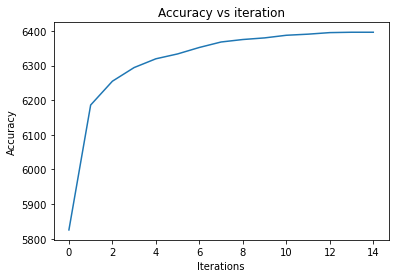

In [24]:
plt.plot(train_loss_counter1,accuracy)
plt.title("Accuracy vs iteration")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Training Loss')

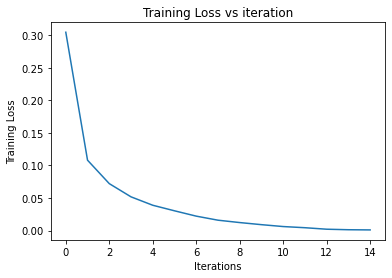

In [25]:
plt.plot(train_loss_counter1,losses1)
plt.title("Training Loss vs iteration")
plt.xlabel("Iterations")
plt.ylabel("Training Loss")

In [26]:
len(train_loss_counter)

0

In [27]:
def test():
    net.eval()
    test_loss = 0
    correct = 0
    test_losses = []
    with torch.no_grad():
        for data, target in test_loader:
            #print(data.shape)
            data = data.view(data.shape[0], -1)
            #print(data.shape)
            output = net(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
        test_loss /= len(test_loader.dataset)
        test_losses.append(test_loss)
        print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


In [28]:
test()

<ipython-input-9-e2cd798931e5>:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
/opt/anaconda3/envs/py38/lib/python3.8/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.0715, Accuracy: 9833/10000 (98%)



In [29]:

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 0


<ipython-input-9-e2cd798931e5>:13: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


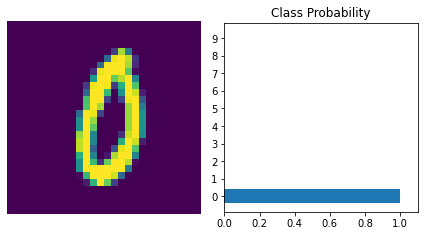

In [30]:
images, labels = next(iter(test_loader))

img = images[0].view(1, 784)
with torch.no_grad():
    logps = net(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)